# Importing libraries and datasets


In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive', force_remount = True)
directory = "/content/drive/MyDrive/Public_folder_Yahoo_RS/"

### Genres ###
genres_columns = ["Id", "Parent", "Level", "Name"]
genres = pd.read_csv(directory + "genre-hierarchy.txt", header = None, sep = '\t', names = genres_columns)
### Songs ###
songs_columns = ["Id", "Album", "Artist", "Genre"]
songs = pd.read_csv(directory + "song-attributes.txt", header = None, sep = '\t', names = songs_columns)
### Ratings ###
ratings_columns = ["User", "Song", "Rating"]
ratings = pd.read_csv(directory + "train_0.txt", header = None, sep = '\t', names = ratings_columns)
#print(ratings)

Mounted at /content/drive


##Usefull information about the dataframes, we have inserted the datasets

In [2]:
print(ratings.info(),'\n',ratings.describe())
ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76344627 entries, 0 to 76344626
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   User    int64
 1   Song    int64
 2   Rating  int64
dtypes: int64(3)
memory usage: 1.7 GB
None 
                User          Song        Rating
count  7.634463e+07  7.634463e+07  7.634463e+07
mean   1.000409e+05  6.827971e+04  3.153490e+00
std    5.775305e+04  3.946131e+04  1.599536e+00
min    0.000000e+00  0.000000e+00  1.000000e+00
25%    4.984000e+04  3.439300e+04  1.000000e+00
50%    1.001390e+05  6.831100e+04  3.000000e+00
75%    1.498160e+05  1.023480e+05  5.000000e+00
max    1.999990e+05  1.367350e+05  5.000000e+00


,User,Song,Rating
0,0,166,5
1,0,2245,4
2,0,3637,4
3,0,5580,4
4,0,5859,4
5,0,7121,3
6,0,10405,4
7,0,16794,5
8,0,17821,5
9,0,21252,4


In [3]:
print(songs.info(),'\n',songs.describe())
songs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136736 entries, 0 to 136735
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Id      136736 non-null  int64
 1   Album   136736 non-null  int64
 2   Artist  136736 non-null  int64
 3   Genre   136736 non-null  int64
dtypes: int64(4)
memory usage: 4.2 MB
None 
                   Id          Album         Artist          Genre
count  136736.000000  136736.000000  136736.000000  136736.000000
mean    68367.500000   10289.869252    4822.384281      15.154685
std     39472.427541    5894.572562    2692.923980      40.874536
min         0.000000       0.000000       0.000000       0.000000
25%     34183.750000    5210.750000    2536.000000       0.000000
50%     68367.500000   10255.000000    4941.000000       0.000000
75%    102551.250000   15406.000000    7088.000000       0.000000
max    136735.000000   20542.000000    9441.000000     215.000000


,Id,Album,Artist,Genre
0,0,12070,8490,0
1,1,19512,7975,134
2,2,18953,3492,0
3,3,695,2653,0
4,4,243,2282,0
5,5,7783,3832,0
6,6,11704,1655,106
7,7,10126,6328,114
8,8,10672,4121,0
9,9,12302,9197,54


In [4]:
print(genres.info(),'\n',genres.describe())
genres.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      216 non-null    int64 
 1   Parent  216 non-null    int64 
 2   Level   216 non-null    int64 
 3   Name    216 non-null    object
dtypes: int64(3), object(1)
memory usage: 6.9+ KB
None 
             Id      Parent       Level
count  216.000  216.000000  216.000000
mean   107.500  101.430556    2.212963
std     62.498   61.875380    0.595345
min      0.000    0.000000    1.000000
25%     53.750   52.250000    2.000000
50%    107.500  106.000000    2.000000
75%    161.250  148.000000    3.000000
max    215.000  211.000000    3.000000


,Id,Parent,Level,Name
0,0,0,1,Unknown
1,1,1,1,Electronic/Dance
2,2,1,2,Ambient
3,3,2,3,Ambient Dub
4,4,2,3,Ambient Tech
5,5,1,2,Breaks
6,6,1,2,Jungle / Drum &amp; Bass
7,7,1,2,House
8,8,7,3,Deep House
9,9,7,3,Tech House


###Find the ratings every user makes - print the number of ratings of the 10 first users

In [5]:
usersnumratings = []   #number of ratings every user has made
cnt=0
#int(len(ratings['User'])/100)
for i in range(int(len(ratings['User'])/100)):  #logicous xronous pairname gia int(len(ratings['User'])/x) opou x>=100. tote int(len(ratings['User'])/100)=763446 , lamvanoume 2021 diaforetika ratings apo 2021 diaforetikous xrhstes
  if ratings['User'][i]==ratings['User'][i+1]:
    cnt+=1
  else:
    usersnumratings.append(cnt+1)
    cnt=0
print(len(usersnumratings))
usersnumratings[0:10]

2021


[34, 387, 358, 122, 70, 21, 1349, 125, 70, 539]

In [6]:
l=[]
mean,cnt=165,0
for i in range(int(len(ratings['User'])/100)):
  if ratings['User'][i]==ratings['User'][i+1]:
    cnt+=1
  else:
    if cnt>=int(mean/2) :
      l.append(ratings['User'][i])
      cnt=0
    else:
      cnt=0 
      
print(l[0:10], len(l))   #id's users with ratings more than half of mean value of int(165/2)=82

[1, 2, 3, 6, 7, 9, 10, 11, 12, 13] 1296


###So, as we can observe , the first user (id=0), voted for 34 different songs , the second for 387 songs , etc ... 
###The mean value of all these ratings is :

In [7]:
from statistics import mean,pstdev,mode
print('Mean value:', round(mean(usersnumratings),2), '\nStandard deviation:', round(pstdev(usersnumratings),2) ,'\nMost common value:', mode(usersnumratings))

Mean value: 374.71 
Standard deviation: 777.6 
Most common value: 20


###So on avergae every user has rated 

*   Στοιχείο λίστας
*   Στοιχείο λίστας

165 songs , with a standard deviation of 150. So the number of ratings of the existed users are a lot spreaded from the mean value.

Text(0.5, 0, 'Number of Ratings a user made')

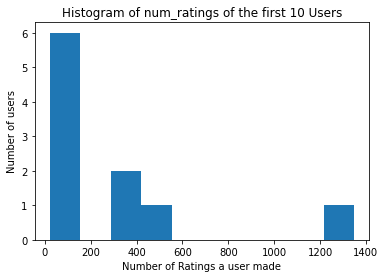

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot for the ratings of the first 10 users 
plt.hist(usersnumratings[0:10])   #np.random.normal(170, 10, 250)
plt.title('Histogram of num_ratings of the first 10 Users')
plt.ylabel('Number of users')
plt.xlabel('Number of Ratings a user made')

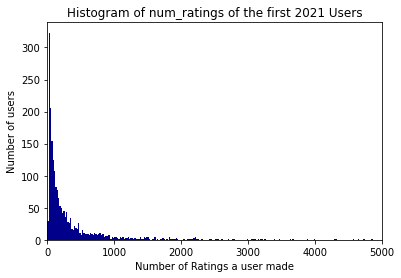

In [9]:
import numpy as np
np_usersnumratings = np.array(usersnumratings)
#np_usersnumratings

plt.hist(np_usersnumratings, color='DarkBlue',bins=500,range=(1,10000))
plt.title('Histogram of num_ratings of the first 2021 Users')
plt.ylabel('Number of users')
plt.xlabel('Number of Ratings a user made')
plt.xlim(0,5000)
plt.show()

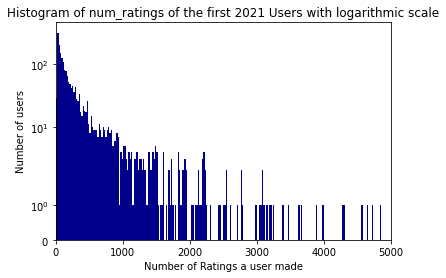

In [10]:
plt.hist(np_usersnumratings, color='DarkBlue',bins=500,range=(1,10000))
plt.title('Histogram of num_ratings of the first 2021 Users with logarithmic scale')
plt.ylabel('Number of users')
plt.xlabel('Number of Ratings a user made')
plt.yscale('symlog')                            #using logarithmic scale
plt.xlim(0,5000)
plt.show()

Text(0, 0.5, 'Number of Ratings a user made')

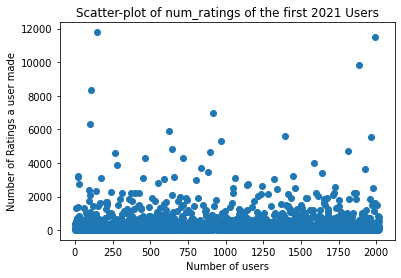

In [11]:
plt.scatter([i for i in range(0,len(usersnumratings))],usersnumratings)
plt.title('Scatter-plot of num_ratings of the first 2021 Users')
plt.xlabel('Number of users')
plt.ylabel('Number of Ratings a user made')

###We can observe that are very little few users who have visited a huge number of songs , in comparison with the mean value (165). Although , most of the users have voted under 1000 songs

# Finding the range of users and songs

In [12]:
import numpy as np
np_ratings = np.array(ratings)

maximum_user = 0
minimum_user = 1000000
maximum_song = 0
minimum_song = 1000000
for rating in np_ratings:
    maximum_user = max(maximum_user, rating[0])
    minimum_user = min(minimum_user, rating[0])
    maximum_song = max(maximum_song, rating[1])
    minimum_song = min(minimum_song, rating[1])
    
print("Minimum user ID :" + str(minimum_user))
print("Maximum user ID :" + str(maximum_user))
print("Minimum song ID :" + str(minimum_song))
print("Maximum song ID :" + str(maximum_song))

Minimum user ID :0
Maximum user ID :199999
Minimum song ID :0
Maximum song ID :136735


# Searching for the optimal dimensions, taking the memory and the time limits into consideration

In [13]:
limit_for_cells = 300000000
total_users = [1000, 2000, 5000, 10000, 20000, 50000]

for limit_for_users in total_users:
    song_list = []
    for rating in np_ratings:
        if(rating[0] < limit_for_users):
            song_list.append(rating[1])
        else:
            break
    np_song_list = np.unique(np.array(song_list))
    if(limit_for_users * len(np_song_list) < limit_for_cells):
        print(str(limit_for_users))
        print("success")

1000
success
2000
success


# Presenting the matrix shape

In [14]:
limit_for_users = 1000
song_list = []
for rating in np_ratings:
    if(rating[0] < limit_for_users):
        song_list.append(rating[1])
    else:
        break
np_song_list = np.sort(np.unique(np.array(song_list)))

matrix = np.zeros((limit_for_users, len(np_song_list)), dtype = np.ushort)
matrix_in_bytes = limit_for_users * len(np_song_list) * matrix.itemsize
print("Matrix columns(users) X lines(total songs being rated): " + str(len(matrix)) +" X "+ str(len(matrix[0])) +"\n\n" + "Matrix total size : " + str(limit_for_users * len(np_song_list)) + " , number of cells = "+ str(matrix_in_bytes) + " B = " + str(matrix_in_bytes / 1000000) + " MB")

Matrix columns(users) X lines(total songs being rated): 1000 X 97739

Matrix total size : 97739000 , number of cells = 195478000 B = 195.478 MB


# Preprocessing the genre and the song table

In [15]:
### Finding the root of each genre ###
np_genres = np.array(genres)
roots = []
for genre in np_genres:
    current = genre[0]
    parent = genre[1]
    while(current != parent):
        current = parent
        parent = np_genres[current][1]
    roots.append(current)
print("Genre with id = 8 : " + str(np_genres[7][3]))
print("The root of this genre is : " + str(np_genres[roots[7]][3]))

Genre with id = 8 : House
The root of this genre is : Electronic/Dance


In [16]:
### Replacing the genre of every song with the root of the genre ###
np_songs = np.array(songs)
for song in range(len(np_songs)):
    np_songs[song][3] = roots[np_songs[song][3]]

# Initializing the matrix with the ratings and computing the mean(ratings) by user and genre

In [17]:
songs_dictionary = {}
for j in range(len(np_song_list)):
    songs_dictionary[np_song_list[j]] = j

### These two dictionaries will help us compute the mean(rating) of every user, depending on the genre of the song ###
### ratings_sum_by_genre : {'i-j': a} means that the user i has total sum(rating) = a in genre j ###
### ratings_by_genre : {'i-j': a} means that the user i has rated a songs with genre j ###
ratings_sum_by_genre = {}
ratings_by_genre = {}
for user in range(limit_for_users):
    for genre in np.sort(np.unique(np.array(roots))):
        ratings_sum_by_genre[str(user) + "-" + str(genre)] = 0
        ratings_by_genre[str(user) + "-" + str(genre)] = 0

for rating in np_ratings:
    if(rating[0] < limit_for_users):
        matrix[rating[0]][songs_dictionary[rating[1]]] = np.ushort(rating[2])
        ratings_sum_by_genre[str(rating[0]) + "-" + str(np_songs[rating[1]][3])] += np.ushort(rating[2])
        ratings_by_genre[str(rating[0]) + "-" + str(np_songs[rating[1]][3])] += 1

### Finally the division (ratings_sum_by_genre / ratings_by_genre) will give us the mean(rating) by user and genre ###
for rating in ratings_sum_by_genre:
    if(ratings_by_genre[rating] != 0):
        ratings_sum_by_genre[rating] /= ratings_by_genre[rating]
print("The user with id = 0 has mean(rating) = " + str(ratings_sum_by_genre['0-134']) + " in genre with id = 135")

The user with id = 0 has mean(rating) = 4.5 in genre with id = 135


### Find how many songs every user hasn't rated at all at the matrix (total zeros on every column)

In [18]:
num_of_zeros,num_of_ratings=[],[]
cnt_zeros,cnt_other=0,0
for user in matrix:
  for rating in user:
    if rating==0:
      cnt_zeros+=1
    else :
      cnt_other+=1
  num_of_zeros.append(cnt_zeros)
  num_of_ratings.append(cnt_other)
  cnt_zeros,cnt_other=0,0
print(num_of_zeros[0:10],"\n",num_of_ratings[0:10])
    

[97705, 97352, 97381, 97617, 97669, 97718, 96390, 97614, 97669, 97200] 
 [34, 387, 358, 122, 70, 21, 1349, 125, 70, 539]


Text(0.5, 0, 'Number of Null Ratings a user made')

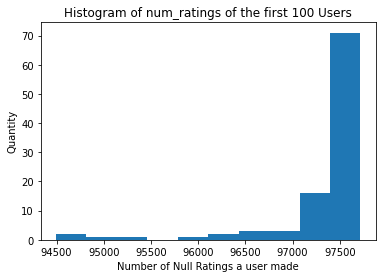

In [19]:
plt.hist(num_of_zeros[0:100])   #np.random.normal(170, 10, 250)
plt.title('Histogram of num_ratings of the first 100 Users')
plt.ylabel('Quantity')
plt.xlabel('Number of Null Ratings a user made')

Text(0.5, 0, 'Number of Ratings a user made')

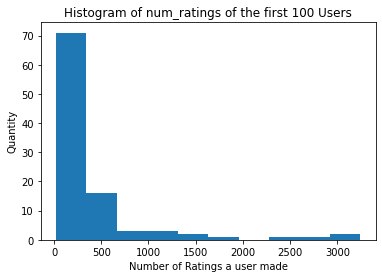

In [20]:
plt.hist(num_of_ratings[0:100])   #np.random.normal(170, 10, 250)
plt.title('Histogram of num_ratings of the first 100 Users')
plt.ylabel('Quantity')
plt.xlabel('Number of Ratings a user made')

### AS we can see, that we have a lot more "null" ratings than actual ratings to the matrix . So we have to find a way to replace the zeros at the matrix optimally

# Replacing the zeros of the matrix and applying the SVD transformation

###Not all user's null ratings can be replaced , because a user might have not rayed at all a genre of music.

In [21]:
songs_dictionary_reversed = {}
for song in songs_dictionary:
    songs_dictionary_reversed[songs_dictionary[song]] = song

for user in range(len(matrix)):
    for song in range(len(np_song_list)):
        if(matrix[user][song] == 0):
            matrix[user][song] = ratings_sum_by_genre[str(user) + "-" + str(np_songs[songs_dictionary_reversed[song]][3])]   #replace with the mean value of a user to a certain genre of music

num_of_zeros,num_of_ratings=[],[]
cnt_zeros,cnt_other=0,0
for user in matrix:
  for rating in user:
    if rating==0:
      cnt_zeros+=1
    else :
      cnt_other+=1
  num_of_zeros.append(cnt_zeros)
  num_of_ratings.append(cnt_other)
  cnt_zeros,cnt_other=0,0
print(num_of_zeros[0:10],"\n",num_of_ratings[0:10])

[7260, 2119, 3432, 2183, 3065, 7260, 2043, 3065, 11083, 4712] 
 [90479, 95620, 94307, 95556, 94674, 90479, 95696, 94674, 86656, 93027]


Text(0.5, 0, 'Number of Null Ratings a user made')

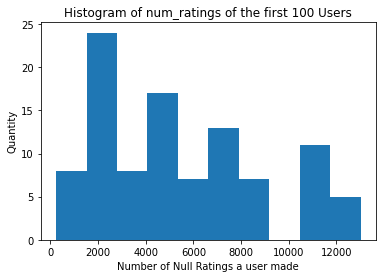

In [22]:
plt.hist(num_of_zeros[0:100])   #np.random.normal(170, 10, 250)
plt.title('Histogram of num_ratings of the first 100 Users')
plt.ylabel('Quantity')
plt.xlabel('Number of Null Ratings a user made')

Text(0.5, 0, 'Number of Ratings a user made')

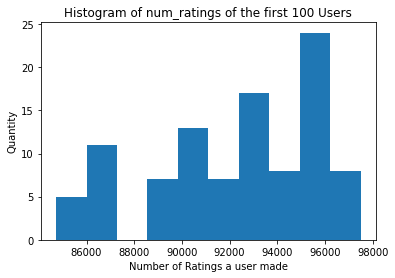

In [23]:
plt.hist(num_of_ratings[0:100])   #np.random.normal(170, 10, 250)
plt.title('Histogram of num_ratings of the first 100 Users')
plt.ylabel('Quantity')
plt.xlabel('Number of Ratings a user made')

In [24]:
### This is a simpler strategy to replace te zeros, based only on the mean(ratings) by user, without taking the genre into consideration ###
for user in matrix:
    m = np.mean(user[user > 0])
    user[user == 0] = m
 
KapaParameter = 100   
U, S, VT = np.linalg.svd(matrix, full_matrices = False)
U = U[:, :KapaParameter]
S = S[:KapaParameter]
V = VT[:KapaParameter, :].T

In [25]:
num_of_zeros,num_of_ratings=[],[]
cnt_zeros,cnt_other=0,0
for user in matrix:
  for rating in user:
    if rating==0:
      cnt_zeros+=1
    else :
      cnt_other+=1
  num_of_zeros.append(cnt_zeros)
  num_of_ratings.append(cnt_other)
  cnt_zeros,cnt_other=0,0
print(num_of_zeros[0:10],"\n",num_of_ratings[0:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
 [97739, 97739, 97739, 97739, 97739, 97739, 97739, 97739, 97739, 97739]


### as we can see, after SVD we have no null values , beacause we replaced all remaing zeros with the mean value of all ratings that a user have made

# Printing the shapes of the new matrices

In [26]:
print("Initial matrix :" + str(matrix.shape[0]) + "x" + str(matrix.shape[1]))
print("Users vector U :" + str(U.shape[0]) + "x" + str(U.shape[1]))
print("Sigma matrix Σ :" + str(S.shape[0]) + "x" + str(S.shape[0]))
print("Songs vector V :" + str(V.shape[0]) + "x" + str(V.shape[1]))

Initial matrix :1000x97739
Users vector U :1000x100
Sigma matrix Σ :100x100
Songs vector V :97739x100


# Computing similarities between users

In [27]:
from scipy import spatial

### The person of interest ###
user_id = 0
### The similirities of this person with the rest users ###
similarities = []
for user in range(limit_for_users): 
    similarities.append([user, 1 - spatial.distance.cosine(U[user_id], U[user])])

print("Similarity between user" + str(user_id) + " and user10 :" + str(similarities[10][1]))
n_closest = 5
similarities.sort(reverse = True, key = lambda x:x[1])
similarities = similarities[1:n_closest + 1]

Similarity between user0 and user10 :-0.05674016471414878


In [28]:
total_similarities = []
for user0 in range(limit_for_users):
    similarities = []
    for user1 in range(limit_for_users): 
        similarities.append(1 - spatial.distance.cosine(U[user0], U[user1]))
    total_similarities.append(similarities)

np_total_similarities = np.array(total_similarities)
print(np_total_similarities[0][10])

-0.05674016471414878


# Predicting ratings based on the new matrices

In [29]:
ratings_columns = ["User", "Song", "Rating"]
test_ratings = pd.read_csv(directory + "test_0.txt", header = None, sep = '\t', names = ratings_columns)

np_test_ratings = np.array(test_ratings)
predicted_ratings = []
for rating in np_test_ratings:
    if rating[0] < limit_for_users and rating[1] in np_song_list:
        similarities_list = np_total_similarities[rating[0]]
        similarities_list_with_index = []
        for sim in range(len(similarities_list)):
            similarities_list_with_index.append([sim, similarities_list[sim]])
        similarities_list_with_index.sort(key = lambda x: x[1], reverse = True)
        similar_users = similarities_list_with_index[:n_closest]
        prediction = 0
        denominator = 0
        for similar_user in similar_users:
            prediction += matrix[similar_user[0]][songs_dictionary[rating[1]]] * similar_user[1]
            denominator += similar_user[1]
        predicted_ratings.append([rating[0], rating[1], prediction / denominator, rating[2]])

predicted_ratings
print("Prediction : The user with id = " + str(predicted_ratings[0][0]) + " would rate with " + str(predicted_ratings[0][2]) + " the song with id = " + str(predicted_ratings[0][1] + 1) + ", while the actual rating is " + str(predicted_ratings[0][3]))

Prediction : The user with id = 0 would rate with 4.799121393576917 the song with id = 7172, while the actual rating is 5


# Defining the mean error of our prediction

In [30]:
import math

total_error = 0
for prediction in predicted_ratings:
    total_error += (prediction[3] - prediction[2]) ** 2
mean_error = total_error / len(predicted_ratings)
print(mean_error)

2.126643347338841


# Showing the mean error if our predictions were totally random

In [31]:
random_predicted_ratings = []
for rating in np_test_ratings:
    if rating[0] < limit_for_users and rating[1] in np_song_list:
        random_predicted_ratings.append([rating[0], rating[1], np.ushort(np.random.randint(0, 6)), rating[2]])

total_error = 0
for prediction in random_predicted_ratings:
    total_error += (prediction[3] - prediction[2]) ** 2
mean_error = total_error / len(random_predicted_ratings)
print(mean_error)

6.218075491759702


# Recommending songs for any user
###(insert a user id from keyboard while running this cell)

In [34]:
user_id = int(input("Please insert the id of the user "))
while(user_id < 0 or user_id > 999):
    user_id = int(input("Please insert a valid id for the user (integer between 0 and 999) "))

predicted_ratings_for_user = []
similarities_list = np_total_similarities[user_id]
similarities_list_with_index = []
for sim in range(len(similarities_list)):
    similarities_list_with_index.append([sim, similarities_list[sim]])
similarities_list_with_index.sort(key = lambda x: x[1], reverse = True)
similar_users = similarities_list_with_index[:n_closest]
for song in np_song_list:
    prediction = 0
    denominator = 0
    for similar_user in similar_users:
        prediction += matrix[similar_user[0]][songs_dictionary[song]] * similar_user[1]
        denominator += similar_user[1]
    predicted_ratings_for_user.append([song, prediction / denominator])
predicted_ratings_for_user.sort(key = lambda x: x[1], reverse = True)
recommendations = predicted_ratings_for_user[:5]
print("Recommendations for user with id->" + str(user_id) + " : ")
count = 1
for song in recommendations:
    print(str(count) + ". " + str(song[0]))
    count = count + 1

Please insert the id of the user 33
Recommendations for user with id->33 : 
1. 33079
2. 108811
3. 70476
4. 24964
5. 64330


### Show the recommendations of 5 random users  

In [33]:
import random

for times in range(5):
  user_id=random.randrange(1000)  #random integer between 0 and 999
  predicted_ratings_for_user = []
  similarities_list = np_total_similarities[user_id]
  similarities_list_with_index = []
  for sim in range(len(similarities_list)):
      similarities_list_with_index.append([sim, similarities_list[sim]])
  similarities_list_with_index.sort(key = lambda x: x[1], reverse = True)
  similar_users = similarities_list_with_index[:n_closest]
  for song in np_song_list:
      prediction = 0
      denominator = 0
      for similar_user in similar_users:
          prediction += matrix[similar_user[0]][songs_dictionary[song]] * similar_user[1]
          denominator += similar_user[1]
      predicted_ratings_for_user.append([song, prediction / denominator])
  predicted_ratings_for_user.sort(key = lambda x: x[1], reverse = True)
  recommendations = predicted_ratings_for_user[:5]
  print("Recommendations for user with id->" + str(user_id) + " : ")
  count = 1
  for song in recommendations:
      print(str(count) + ". " + str(song[0]))
      count = count + 1


Recommendations for user with id->994 : 
1. 44496
2. 30628
3. 136004
4. 124014
5. 42781
Recommendations for user with id->771 : 
1. 8063
2. 95927
3. 134732
4. 5631
5. 13859
Recommendations for user with id->738 : 
1. 27058
2. 1022
3. 6054
4. 6085
5. 7520
Recommendations for user with id->80 : 
1. 23676
2. 119065
3. 20546
4. 12
5. 43
Recommendations for user with id->57 : 
1. 17274
2. 67065
3. 116928
4. 103428
5. 9
